In [1]:
import pandas as pd


df = pd.read_csv(r"C:\Users\DWIGHT JIRO\Downloads\cytof_one_experiment.csv")
df.head()


,NKp30,KIR3DL1,NKp44,KIR2DL1,GranzymeB,CXCR6,CD161,KIR2DS4,NKp46,NKG2D,...,CD16,TNFa,ILT2,Perforin,KIR2DL2.L3.S2,KIR2DL3,NKG2A,NTB.A,CD56,INFg
0,0.187595,3.615693,-0.560569,-0.293665,2.477893,-0.144701,-0.315287,1.944970,4.081832,2.620078,...,3.995142,0.901435,-0.386028,6.431983,1.227103,2.660658,-0.522061,4.348923,2.897523,-0.384111
1,1.034852,1.700182,-0.288961,-0.479828,3.261016,-0.033924,-0.411213,3.802517,3.733930,-0.483279,...,4.408231,1.935902,2.983875,6.814827,-0.041411,3.841305,4.677115,3.474335,3.782870,2.718630
2,2.999640,6.141142,1.903261,0.482310,4.277562,1.946542,-0.502235,-0.320102,4.559463,-0.506909,...,6.002324,-0.023370,-0.521100,5.099562,-0.167051,-0.009694,-0.473057,5.634341,5.701186,2.532176
3,4.299859,-0.221159,0.242571,-0.483127,3.351808,0.926222,3.877237,-0.169695,4.483149,1.927229,...,5.823870,-0.607937,-0.043784,5.841797,-0.517533,-0.592991,-0.405905,4.598021,6.065672,2.456458
4,-0.438645,-0.503589,-0.152632,0.750613,3.194145,-0.058936,1.090738,-0.050330,0.837936,-0.458167,...,4.012250,-0.619891,1.182703,4.888777,-0.362516,-0.398124,-0.544088,3.606101,1.966169,3.147009


In [103]:
df[["Perforin"]]

,Perforin
0,6.431983
1,6.814827
2,5.099562
3,5.841797
4,4.888777
...,...
49995,5.437846
49996,6.581063
49997,3.858176
49998,7.409355


### We choose our column to be "Perforin". This is our set of data points that we are going to analyze the ditribution of data

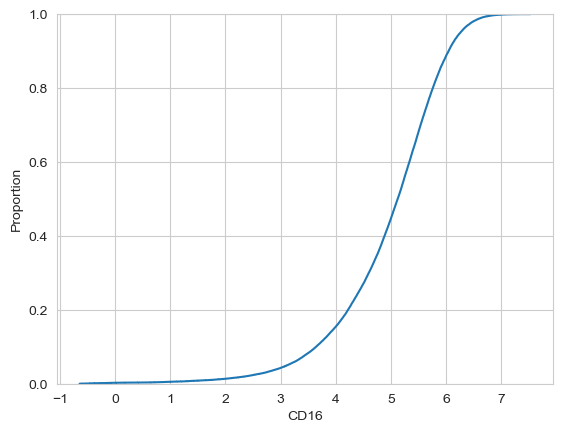

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.ecdfplot(data=df,x='PerforinPerforin')
plt.show()

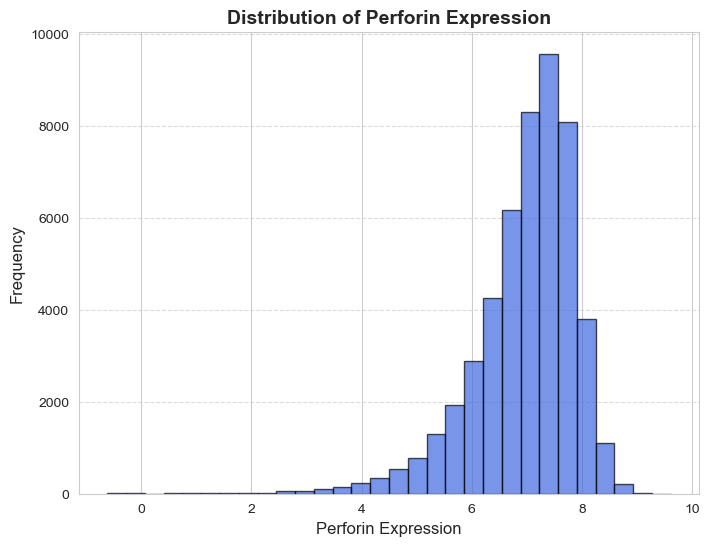

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
plt.hist(df['Perforin'], bins=30, color='royalblue', edgecolor='black', alpha=0.7)

plt.xlabel("Perforin Expression", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Perforin Expression", fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


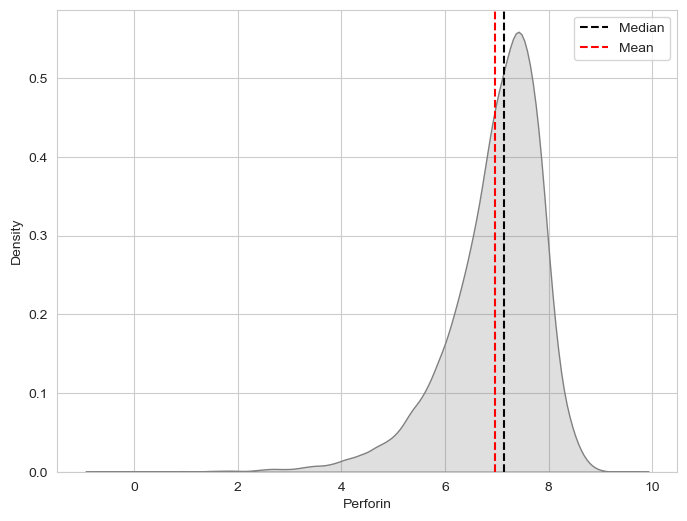

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df['Perforin'], color='grey', ax=ax, shade=True)

median = df['Perforin'].median()
mean=df['Perforin'].mean()

ax.axvline(median, color='black', linestyle='--', label='Median')
ax.axvline(mean, color='red', linestyle='--', label='Mean')

ax.legend()


plt.show()


In [43]:
from scipy.stats import skew 
  

print(skew(df['CD16'], axis=0, bias=True))

-1.2137501597286533


### As we see on our 3 graphs, we have a negtive skewness. It means that most of the data rely on the highest value. If the data is about a score of studednts in a test then it means that most of the students got a high score compared to lower scores.

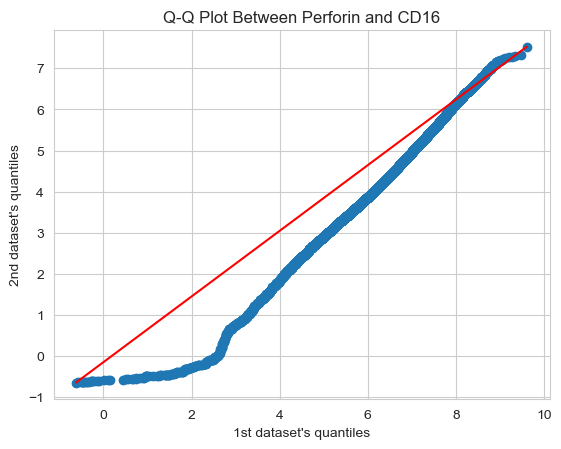

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


perforin = df['Perforin'].sort_values(ascending=True)
cd16 = df['CD16'].sort_values(ascending=True)

if len(perforin) != len(cd16):
    raise ValueError("The two datasets must have the same number of points before plotting a Q-Q plot.")

plt.scatter(perforin, cd16)
plt.plot([min(perforin), max(perforin)], [min(cd16), max(cd16)], color="red")

plt.xlabel("1st dataset's quantiles")
plt.ylabel("2nd dataset's quantiles")
plt.title("Q-Q Plot Between Perforin and CD16")
plt.show()



### As we see in our Q-Q Plot,  The y – quantiles are lower than the x – quantiles. It indicates y values have a tendency to be lower than x value. So it means that the Peforin have much higher group of value compared to CD16.  

#### We can also visualize this in our alternate solutions:



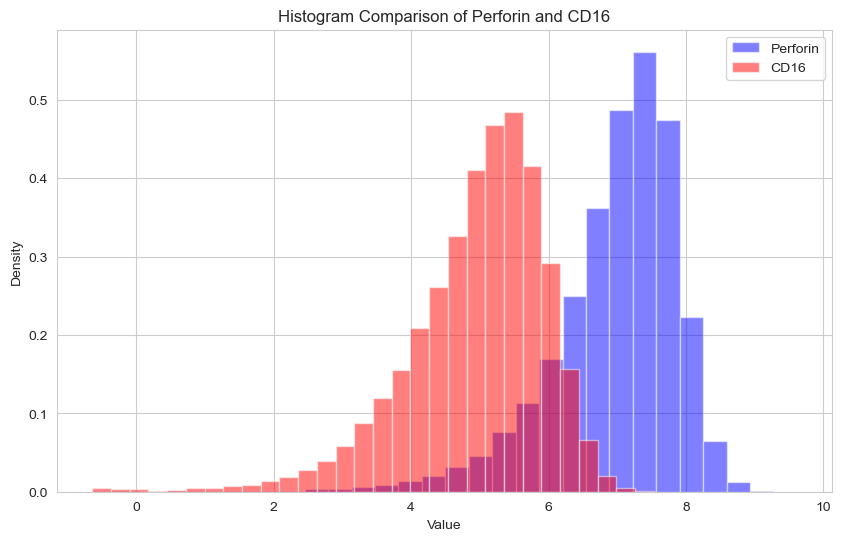

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

perforin = df['Perforin']
cd16 = df['CD16']

plt.figure(figsize=(10, 6))

plt.hist(perforin, bins=30, alpha=0.5, label='Perforin', density=True, color='blue')
plt.hist(cd16, bins=30, alpha=0.5, label='CD16', density=True, color='red')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram Comparison of Perforin and CD16')

plt.legend()

plt.show()


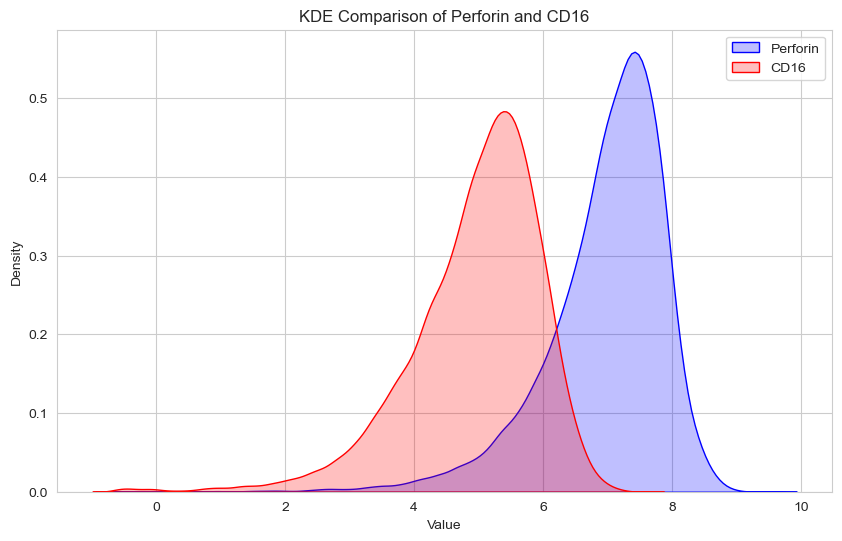

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

perforin = df['Perforin']
cd16 = df['CD16']

plt.figure(figsize=(10, 6))

sns.kdeplot(perforin, label='Perforin', color='blue', shade=True)
sns.kdeplot(cd16, label='CD16', color='red', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Comparison of Perforin and CD16')

plt.legend()
plt.show()


##### As shown, perforin have much higher value, that is why our QQ Plot point lies below our axis